In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
train_data=pd.read_csv(r'D:\BaiduNetdiskDownload\python\项目\文本处理项目\nlp-getting-started\train.csv')
test_data=pd.read_csv(r'D:\BaiduNetdiskDownload\python\项目\文本处理项目\nlp-getting-started\test.csv')

In [4]:
train_data.duplicated().sum()

0

In [5]:
test_data.duplicated().sum()

0

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
train_data['text'].head(50)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

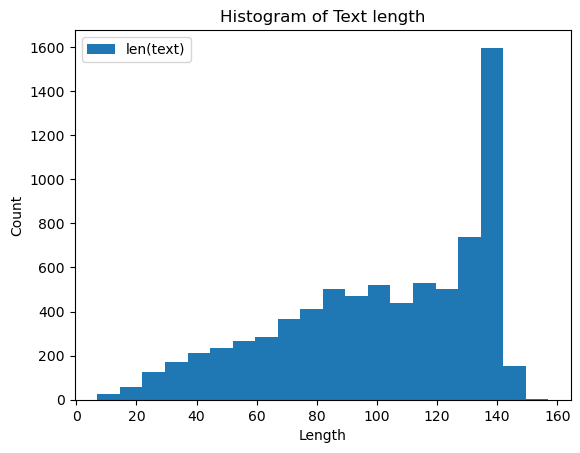

In [9]:
#单词长度分布图
plt.hist(train_data['text'].apply(len),20,label='len(text)')
plt.title('Histogram of Text length')
plt.ylabel('Count')
plt.xlabel('Length')
plt.legend()

No handles with labels found to put in legend.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

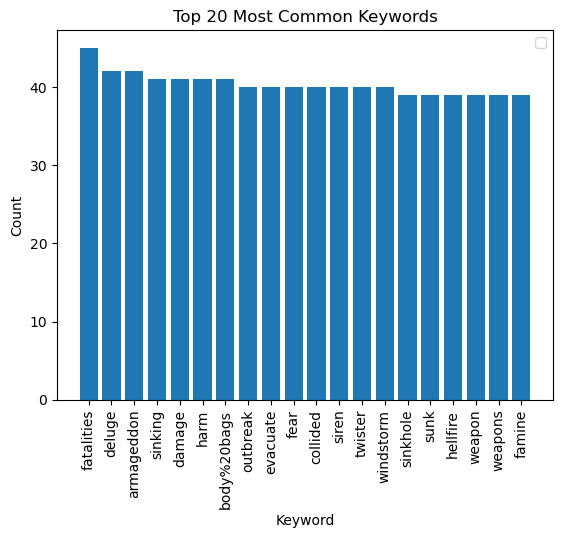

In [10]:
keywords=train_data['keyword'].value_counts().head(20)
plt.bar(keywords.index,keywords.values)
plt.title('Top 20 Most Common Keywords')
plt.ylabel('Count')
plt.xlabel('Keyword')
plt.legend()
plt.xticks(rotation=90)

No handles with labels found to put in legend.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

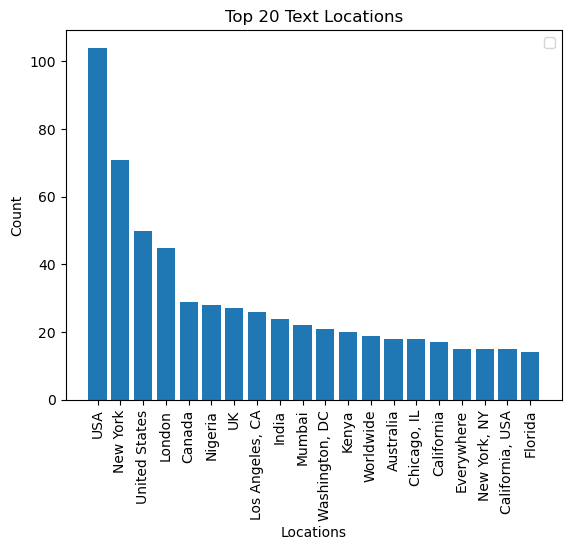

In [11]:
location=train_data['location'].value_counts().head(20)
plt.bar(location.index,location.values)
plt.legend()
plt.title('Top 20 Text Locations')
plt.ylabel('Count')
plt.xlabel('Locations')
plt.xticks(rotation=90)

No handles with labels found to put in legend.


Text(0.5, 0, 'Target')

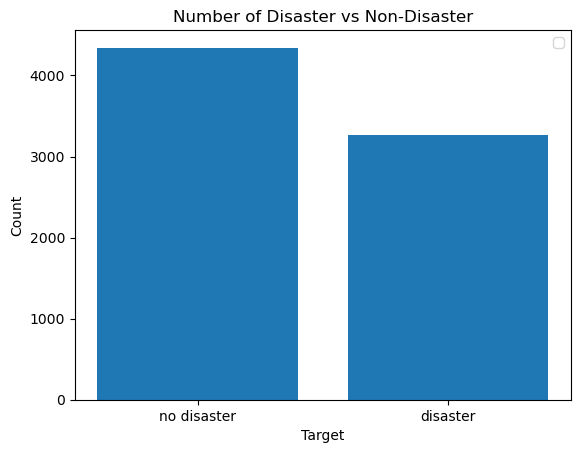

In [12]:
target=train_data['target'].value_counts()
plt.bar(['no disaster','disaster'],target.values)
plt.legend()
plt.title('Number of Disaster vs Non-Disaster')
plt.ylabel('Count')
plt.xlabel('Target')

In [22]:
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords  #停用词里面储存了没有信息意义的常用词

In [14]:
#分割训练集和测试集
train,val=train_test_split(train_data,test_size=0.2,random_state=40)

In [37]:
def clean_text(text):
    text=re.sub(r'[^\s\w]','',text)
    text=text.lower()
    #删除没有意义的常用单词
    stop_words=set(stopwords.words('english'))
    # print(stop_words)
    text=' '.join([word for word in text.split() if word not in stop_words]  )
    return text
train['clean_text']=train['text'].apply(clean_text)
val['clean_text']=val['text'].apply(clean_text)
test_data['clean_text']=test_data['text'].apply(clean_text)

In [38]:
#将词转化为词向量
grove_file=r'D:\BaiduNetdiskDownload\python\项目\文本处理项目\zip\glove.6B\glove.6B.100d.txt'#此文件是以空格分开单词与数值之间，树枝与数值之间
word_vectors={}
with open(grove_file,encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vector=np.asarray(values[1:],dtype='float32')
        word_vectors[word]=vector

def create_features(text,vector_dict,vector_size):
    features=np.zeros((len(text),vector_size))
    for i ,sentence in enumerate(text):
        sentence_features=np.zeros((vector_size,))
        words=sentence.split()
        for word in words:
            if word in vector_dict:
                sentence_features+=vector_dict[word]
        features[i,:]=sentence_features
    return features

train_features=create_features(train['clean_text'],word_vectors,100)
val_features=create_features(val['clean_text'],word_vectors,100)
test_features=create_features(test_data['clean_text'],word_vectors,100)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid={'C':[0.01,0.1,1,10,100],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
lr=LogisticRegression()
grid_search=GridSearchCV(lr,param_grid=param_grid,cv=5) #构建逻辑回归的参数
grid_search.fit(train_features,train['target'])
print('Best Parameters:',grid_search.best_params_)
print('Best Scores:',grid_search.best_score_)
lr_best=LogisticRegression(**grid_search.best_params_)
lr_best.fit(train_features,train['target'])
y_pred=lr_best.predict(val_features)
accuracy=accuracy_score(val['target'],y_pred)
print('Accuracy:',accuracy)
conf=confusion_matrix(val['target'],y_pred)
print('Confusion_matrix:',conf)
report=classification_report(val['target'],y_pred)
print(report)

D:\Users\13404\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\13404\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\13404\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\13404\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\13404\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\13404\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs fa

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Scores: 0.7985221674876847
Accuracy: 0.7984241628365069
Confusion_matrix: [[735 117]
 [190 481]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       852
           1       0.80      0.72      0.76       671

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [41]:
from sklearn.svm import SVC #运行速度比逻辑回归快
svm=SVC()
svm.fit(train_features,train['target'])
y_pred=svm.predict(val_features)
accuracy=accuracy_score(val['target'],y_pred)
print('Accuracy:',accuracy)
conf=confusion_matrix(val['target'],y_pred)
print('Confusion_matrix:',conf)
report=classification_report(val['target'],y_pred)
print(report)

Accuracy: 0.8095863427445831
Confusion_matrix: [[766  86]
 [204 467]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       852
           1       0.84      0.70      0.76       671

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [43]:
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':[2,3,4,5],'min_samples_leaf':[1,2,3],'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
grid_search=GridSearchCV(dtc,param_grid=param_grid,cv=5) #构建逻辑回归的参数
grid_search.fit(train_features,train['target'])
print('Best Parameters:',grid_search.best_params_)
print('Best Scores:',grid_search.best_score_)
dtc_best=DecisionTreeClassifier(**grid_search.best_params_)
dtc_best.fit(train_features,train['target'])
y_pred=dtc_best.predict(val_features)
accuracy=accuracy_score(val['target'],y_pred)
print('Accuracy:',accuracy)
conf=confusion_matrix(val['target'],y_pred)
print('Confusion_matrix:',conf)
report=classification_report(val['target'],y_pred)
print(report)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
Best Scores: 0.7399014778325124
Accuracy: 0.7202889034799738
Confusion_matrix: [[714 138]
 [288 383]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       852
           1       0.74      0.57      0.64       671

    accuracy                           0.72      1523
   macro avg       0.72      0.70      0.71      1523
weighted avg       0.72      0.72      0.71      1523



In [44]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[50,100,200],'max_depth':[5,10,None],'max_features':['sqrt','log2']}
rfc=RandomForestClassifier()
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=5) #构建逻辑回归的参数
grid_search.fit(train_features,train['target'])
print('Best Parameters:',grid_search.best_params_)
print('Best Scores:',grid_search.best_score_)
rfc_best=RandomForestClassifier(**grid_search.best_params_)
rfc_best.fit(train_features,train['target'])
y_pred=rfc_best.predict(val_features)
accuracy=accuracy_score(val['target'],y_pred)
print('Accuracy:',accuracy)
conf=confusion_matrix(val['target'],y_pred)
print('Confusion_matrix:',conf)
report=classification_report(val['target'],y_pred)
print(report)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
Best Scores: 0.8003284072249588
Accuracy: 0.8010505581089954
Confusion_matrix: [[759  93]
 [210 461]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       852
           1       0.83      0.69      0.75       671

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [56]:
from sklearn.metrics import roc_auc_score,recall_score,precision_score,accuracy_score,roc_curve,auc
roc_auc_score(val['target'],y_pred)
auc(fpr,tpr)

0.7889396738103734

In [48]:
recall_score(val['target'],y_pred)

0.6870342771982116

In [49]:
precision_score(val['target'],y_pred)

0.8321299638989169

In [50]:
accuracy_score(val['target'],y_pred)

0.8010505581089954

In [54]:
fpr,tpr,threhold=roc_curve(val['target'],y_pred)
fpr,tpr,threhold

(array([0.        , 0.10915493, 1.        ]),
 array([0.        , 0.68703428, 1.        ]),
 array([2, 1, 0], dtype=int64))

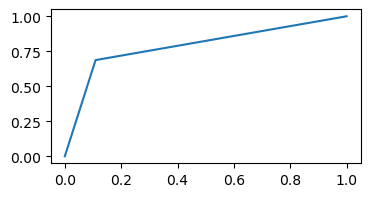

In [63]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4,2))
plt.plot(fpr,tpr)

In [3]:
a=set()

set

set()

In [4]:
a.add(1)

In [5]:
a

{1}